# Short Skimage Tutorial (Introduction - II part)


## Displaying images and graphics ##

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

See how to visualize multiple images:

The simples way is as follows:

In [1]:
from matplotlib import pyplot as plt
from skimage import data
cat = data.chelsea()
from skimage.color import rgb2gray


fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(13,13))

ax[0,0].imshow(cat)
ax[0,0].axis('off')
ax[0,0].set_title('original cat')

ax[0,1].imshow(rgb2gray(cat), cmap='gray')
ax[0,1].axis('off')
ax[0,1].set_title('grey cat')

ax[0,2].imshow(cat*2, vmin=0, vmax=255)
ax[0,2].axis('off')
ax[0,2].set_title('cat*2')

cat4=cat/2
ax[1,0].imshow(cat4.astype(int), vmin=0, vmax=255)
ax[1,0].axis('off')
ax[1,0].set_title('cat/2')

cat8=cat*.5
ax[1,1].imshow(cat4.astype(int), vmin=0, vmax=255)
ax[1,1].axis('off')
ax[1,1].set_title('cat*.5')

cat9=cat+20
ax[1,2].imshow(cat9.astype(int), vmin=0, vmax=255)
ax[1,2].axis('off')
ax[1,2].set_title('cat+20')

plt.show()

<Figure size 1300x1300 with 6 Axes>

Alternative:

float64 0.0 115.5


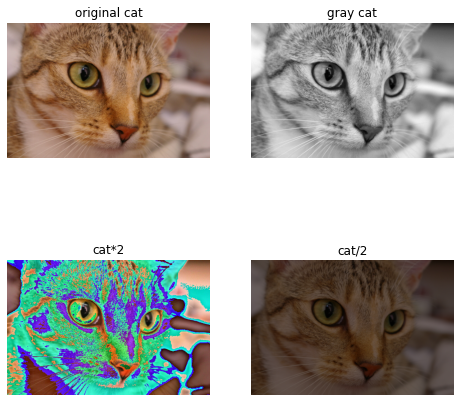

In [2]:
from skimage import img_as_uint
from skimage import data
from skimage.color import rgb2gray

cat = data.chelsea()
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2, 2, 1)
plt.imshow(cat)
plt.axis('off')
plt.title('original cat')

fig.add_subplot(2, 2, 2)
plt.imshow(rgb2gray(cat), cmap='gray')
plt.axis('off')
plt.title('gray cat')

fig.add_subplot(2, 2, 3)
plt.imshow(cat*2, vmin=0, vmax=255)
plt.axis('off')
plt.title('cat*2')

fig.add_subplot(2, 2, 4)
cat4=cat/2
print(cat4.dtype, cat4.min(), cat4.max())
plt.imshow(cat4.astype(int), vmin=0, vmax=255)
plt.axis('off')
plt.title('cat/2')

plt.show()

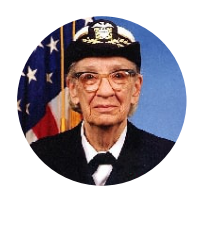

In [3]:
"""
Demo of image that's been clipped by a circular patch.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook
from skimage import io

image = io.imread('images/grace_hopper.jpg')

# Adding the circular path
fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((100, 100), radius=90, transform=ax.transData)
im.set_clip_path(patch)
ax.axis('off')

plt.show()



**Exercise:** Visualize in a figure of four images, in 2 rows and 2 columns: a) the astronaut image, b) the astronaut with a black mask, c) the astronaut converted into gray levels and d) the astronaut with double reduced size. Add titles to explain what each image represents to. 

In [4]:
"""Solution"""

'Solution'

## Spatial and photometric resolution: 
### Function `rescale` 

Quality of images is directly related to spatial and photometric resolution. Sometimes we need to change the spatial and photometric resolution of an image. For this, we will use functions like rescale and resize. Consider the following example:

In [5]:
from skimage import data
from skimage.transform import rescale
import numpy as np
from skimage import io

image = data.coins() # reading the image coins
print('Type: ', image.dtype, ' Min.value: ', image.min(), ' Max.value: ', image.max(), ' Image shape: ', image.shape) #printing basic image parameters

Type:  uint8  Min.value:  1  Max.value:  252  Image shape:  (303, 384)


In [6]:
rescaled = rescale(image, 1)
print(rescaled.dtype, np.round(rescaled.min(),4), np.round(rescaled.max(),4), rescaled.shape)

float64 0.0039 0.9882 (303, 384)


In [7]:
rescaled = rescale(image, 0.5)
print(rescaled.dtype, np.round(rescaled.min(),4), np.round(rescaled.max(),4), rescaled.shape)

float64 0.0157 0.9114 (152, 192)


*What does the function rescale do? Check [skimage](https://scikit-image.org/docs/dev/auto_examples/transform/plot_rescale.html) documentation.*

float64 4.0 232.4 (152, 192)


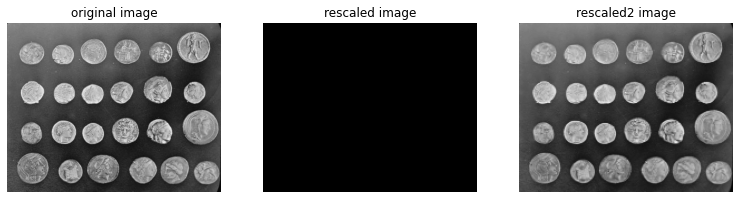

In [8]:
rescaled2 = rescale(image, 0.5, preserve_range=True)
print(rescaled2.dtype, np.round(rescaled2.min(),1), np.round(rescaled2.max(),1), 
      rescaled2.shape)


fig, ax = plt.subplots(ncols=3, figsize=(13,13))

ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0].axis('off')
ax[0].set_title('original image')

ax[1].imshow(rescaled, cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')
ax[1].set_title('rescaled image')

ax[2].imshow(rescaled2, cmap='gray', vmin=0, vmax=255)
ax[2].axis('off')
ax[2].set_title('rescaled2 image')


plt.show()


Explain the figure

How to rescale intensity values?

Type:  uint8  Min.value:  0  Max.value:  255  Image shape:  (512, 512)


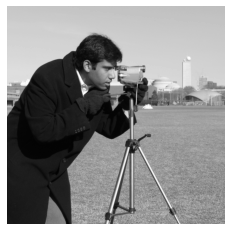

In [9]:
camera = data.camera()
print('Type: ', camera.dtype, ' Min.value: ', camera.min(), ' Max.value: ', 
      camera.max(), ' Image shape: ', camera.shape) #printing basic image parametersprint(camera.dtype, camera.max(), camera.min(), camera.shape)
plt.imshow(camera, cmap='gray')
plt.axis('off')
plt.show()

Type:  float64  Min.value:  0.0  Max.value:  127.5  Image shape:  (512, 512)


(-0.5, 511.5, 511.5, -0.5)

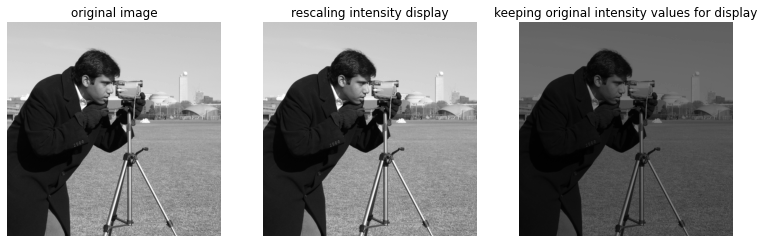

In [10]:
camera2 = camera/2
print('Type: ', camera2.dtype, ' Min.value: ', camera2.min(), ' Max.value: ', 
      camera2.max(), ' Image shape: ', camera2.shape) #printing basic image parametersprint(camera.dtype, camera.max(), camera.min(), camera.shape)

fig, ax=plt.subplots(ncols=3, figsize=(13,13))

ax[0].imshow(camera2, cmap='gray')
ax[0].set_title('original image')
ax[0].axis('off')

ax[1].imshow(camera2, cmap='gray', vmin=camera2.min(), vmax=camera2.max())
ax[1].set_title('rescaling intensity display')
ax[1].axis('off')

ax[2].imshow(camera2, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('keeping original intensity values for display')
ax[2].axis('off')


Type:  float64  Min.value:  100.0  Max.value:  227.5  Image shape:  (512, 512)


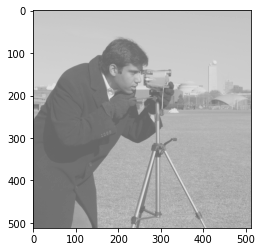

(0.0, 1.0, 0.0, 1.0)

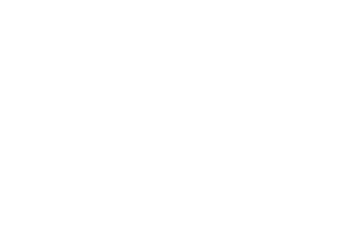

In [11]:
camera3 = camera2+100
print('Type: ', camera3.dtype, ' Min.value: ', camera3.min(), ' Max.value: ', 
      camera3.max(), ' Image shape: ', camera3.shape) #printing basic image parametersprint(camera.dtype, camera.max(), camera.min(), camera.shape)
plt.imshow(camera3, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.axis('off')

What is the difference between rescale and resize?

Type:  uint8  Min.value:  3  Max.value:  233  Image shape:  (64, 64)


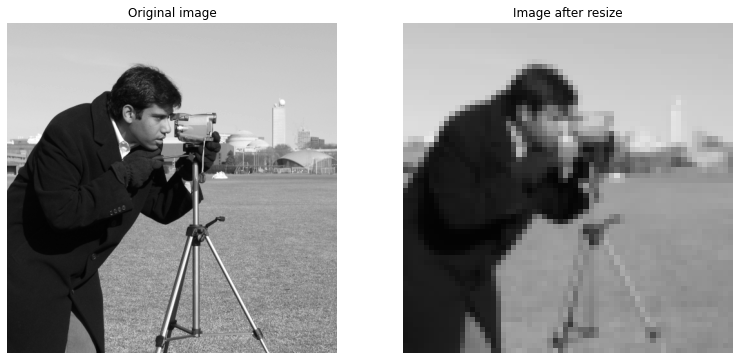

In [12]:
from skimage.transform import resize
from skimage import data
from matplotlib import pyplot as plt
from skimage import img_as_ubyte # img_as_ubyte Convert an image to 8-bit unsigned integer format

camera4 = img_as_ubyte(resize(camera,(64,64))) 
print('Type: ', camera4.dtype, ' Min.value: ', camera4.min(), ' Max.value: ', 
      camera4.max(), ' Image shape: ', camera4.shape) #printing basic image parametersprint(camera.dtype, camera.max(), camera.min(), camera.shape)

fig,ax=plt.subplots(ncols=2, figsize=(13,13))

ax[0].imshow(camera, cmap='gray', vmin=0, vmax=255)
ax[0].axis('off')
ax[0].set_title('Original image')

ax[1].imshow(camera4, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Image after resize')
ax[1].axis('off')

plt.show()

Explain the results

More examples can be seen in the [Matplotlib Image tutorial](https://matplotlib.org/users/image_tutorial.html).

### Conversion between color and gray values

Often we will need to convert color images to gray level images. Converting an RGB image to a grayscale image is per with `rgb2gray()`

Text(0.5, 1.0, 'Grayscale image')

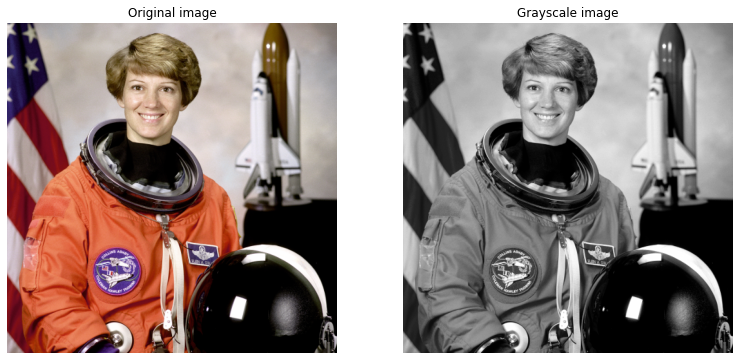

In [13]:
from skimage.color import rgb2gray

img = data.astronaut()

fig, ax=plt.subplots(ncols=2, figsize=(13,13))
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original image')

img_gray = rgb2gray(img)
ax[1].imshow(img_gray, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Grayscale image')



In [14]:
print ("Note that dtype: ", img.dtype, "gray.max: ", img.max()) 
print ("dtype: ", img_gray.dtype, "gray.max: ", img_gray.max())

Note that dtype:  uint8 gray.max:  255
dtype:  float64 gray.max:  1.0


**Converting color to gray intensity values:**

In [15]:
red_pixel = np.array([[[255, 0, 0]]], dtype=np.uint8)
print("Red to gray: ", rgb2gray(red_pixel))

green_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)
print ("Green to gray: ", rgb2gray(green_pixel))


Red to gray:  [[0.2125]]
Green to gray:  [[0.7154]]


Given a gray image, how would it be looking if it is converted to RGB values? 

### Conversion from RGBA to RGB - Removing alpha channel through alpha blending

Often you can find color images in format [RGBA](https://en.wikipedia.org/wiki/Alpha_compositing#Alpha_blending). The forth component shows the coefficient of blending of each channel. Converting an RGBA image to an RGB image by alpha blending it with a background is performend by the command `rgba2rgb()`. You can find in the library where all color conversion functions are: skimage.color.

dtype:  uint8
shape:  (500, 500, 4)


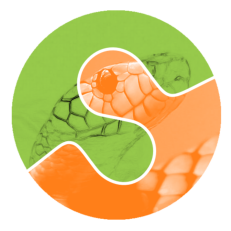

In [16]:
from skimage.color import rgba2rgb
# RGBA has 24 bits for RGB color, bit there is an additional 8 bit value for transparency.

img_rgba = data.logo()
print("dtype: ", img_rgba.dtype)
print('shape: ', img_rgba.shape)
plt.imshow(img_rgba)
plt.axis('off')
plt.show()

dtype:  float64
shape:  (500, 500, 3)


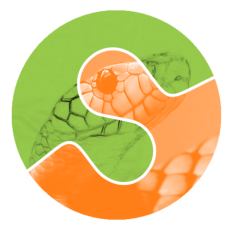

In [17]:
img_rgb = rgba2rgb(img_rgba)
print("dtype: ", img_rgb.dtype)
print('shape: ', img_rgb.shape)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
